# Visualizing the shifts that I've worked at Staples
This comes from my Google Sheets

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Patch
from datetime import date

## Setup the file

In [9]:
csvName = 'Staples Finances 2023-24.csv'
csvName = 'sheet-closet/original-sheets/Staples Finances 2025.csv'

currentYear = '2025'

if csvName == 'Staples Finances 2023-24.csv': 
    currentYear = '2024'

## Cleanup file 

In [10]:
df = pd.read_csv(csvName)

# print(df.head(100))


# Remove columns that are over 30% NaN
numRows = len(df)
for col in df.columns: 
    numNaN = df[col].isna().sum()
    percentEmpty = numNaN / numRows

    if percentEmpty > 0.30 and col != 'YEAR SELECTOR': 
        print(f"{percentEmpty:.3f}")
        print(f"Dropping the col {col}")
        df.drop(col, axis=1, inplace=True)

# Rename 'DATE ' to 'DATE'
if 'DATE ' in df.columns:
    df.rename(columns={'DATE ': 'DATE'}, inplace=True)

print(df)

0.820
Dropping the col Unnamed: 0
0.820
Dropping the col WKLY HRS
1.000
Dropping the col Unnamed: 3
0.780
Dropping the col LUNCH IN
0.780
Dropping the col LUNCH OUT
1.000
Dropping the col Unnamed: 9
0.820
Dropping the col PAYCHCK
0.820
Dropping the col Assumed tax
0.880
Dropping the col DATE RECIEVED
1.000
Dropping the col Unnamed: 17
0.680
Dropping the col bfr tax est total:
1.000
Dropping the col $3,844.83
1.000
Dropping the col paychck tot:
1.000
Dropping the col $2,706.34
1.000
Dropping the col Difference:
1.000
Dropping the col $1,138.49
1.000
Dropping the col 30%
                YEAR SELECTOR        DATE        IN       OUT  time  hours  \
0                         NaN         NaN       NaN       NaN  0:00   0.00   
1                      $17.80         NaN       NaN       NaN  0:00   0.00   
2                      $18.50         NaN       NaN       NaN  0:00   0.00   
3                      $25.35         NaN       NaN       NaN  0:00   0.00   
4                       $0.00     

## Convert to correct time format

Notice that you will get an error if you do not RELOAD the data before running this cell.

In [11]:
df['IN'] = pd.to_datetime(df['IN'], format='%I:%M %p').dt.time
df['OUT'] = pd.to_datetime(df['OUT'], format='%I:%M %p').dt.time
df['time'] = pd.to_datetime(df['time'], format='%H:%M').dt.time

print(df)

                YEAR SELECTOR        DATE        IN       OUT      time  \
0                         NaN         NaN       NaT       NaT  00:00:00   
1                      $17.80         NaN       NaT       NaT  00:00:00   
2                      $18.50         NaN       NaT       NaT  00:00:00   
3                      $25.35         NaN       NaT       NaT  00:00:00   
4                       $0.00         NaN       NaT       NaT  00:00:00   
5                         NaN         NaN       NaT       NaT  00:00:00   
6                         NaN         NaN       NaT       NaT  00:00:00   
7                         NaN         NaN       NaT       NaT  00:00:00   
8                         NaN         NaN       NaT       NaT  00:00:00   
9                         NaN         NaN       NaT       NaT  00:00:00   
10                        NaN         NaN       NaT       NaT  00:00:00   
11                        NaN         NaN       NaT       NaT  00:00:00   
12                       

## Label 2023 and 2024 data

In [12]:
lastRowOf2024 = len(df)
firstRowOf2024 = len(df)

if currentYear == '2024':
    for idx, cell in df['YEAR SELECTOR'].items():

        # Find the last row of 2024
        if cell == '2024  ⬆️':
            lastRowOf2024 = idx
            print(lastRowOf2024)

elif currentYear == '2025':
    for idx, cell in df['YEAR SELECTOR'].items():

        # Find the first row of 2024
        if cell == '2024 ⬇️':
            firstRowOf2024 = idx
            print(firstRowOf2024)
    

47


## Convert to correct date format

Notice that you will get an error if you do not RELOAD the data before running this cell.

In [13]:
if currentYear == '2024':
    df.loc[0:lastRowOf2024, 'DATE'] = pd.to_datetime(
        df.loc[0:lastRowOf2024, 'DATE'] + ' ' + currentYear,
        format='%a %b %d %Y',
        errors='coerce'
    ).dt.date
    df.loc[lastRowOf2024:len(df), 'DATE'] = pd.to_datetime(
        df.loc[lastRowOf2024:len(df), 'DATE'] + ' 2023',
        format='%a %b %d %Y',
        errors='coerce'
    ).dt.date
elif currentYear == '2025': 
    df.loc[0:firstRowOf2024, 'DATE'] = pd.to_datetime(
        df.loc[0:firstRowOf2024, 'DATE'].astype(str) + f' {currentYear}',
        format='%a %b %d %Y',
        errors='coerce'
    ).dt.date
    df.loc[firstRowOf2024:len(df), 'DATE'] = pd.to_datetime(
        df.loc[firstRowOf2024:len(df), 'DATE'].astype(str) + f' 2024',
        format='%a %b %d %Y', 
        errors='coerce'
        ).dt.date
df['DATE'] = df['DATE'] 
print(df)

                YEAR SELECTOR        DATE        IN       OUT      time  \
0                         NaN         NaT       NaT       NaT  00:00:00   
1                      $17.80         NaT       NaT       NaT  00:00:00   
2                      $18.50         NaT       NaT       NaT  00:00:00   
3                      $25.35         NaT       NaT       NaT  00:00:00   
4                       $0.00         NaT       NaT       NaT  00:00:00   
5                         NaN         NaT       NaT       NaT  00:00:00   
6                         NaN         NaT       NaT       NaT  00:00:00   
7                         NaN         NaT       NaT       NaT  00:00:00   
8                         NaN         NaT       NaT       NaT  00:00:00   
9                         NaN         NaT       NaT       NaT  00:00:00   
10                        NaN         NaT       NaT       NaT  00:00:00   
11                        NaN         NaT       NaT       NaT  00:00:00   
12                       

## Remove shifts during winter break (2025)

In [14]:
if currentYear == '2025':
    df = df[df['DATE'] >= date(2025, 5, 1)]
    print(df)

   YEAR SELECTOR        DATE        IN       OUT      time  hours     EARN  \
12           NaN  2025-07-19  14:03:00  19:39:00  05:36:00   5.60  $103.60   
13           NaN  2025-07-18  15:57:00  20:19:00  04:22:00   4.37   $80.78   
14           NaN  2025-07-18  09:00:00  12:21:00  03:21:00   3.35   $61.98   
15           NaN  2025-07-17  09:52:00  16:27:00  06:35:00   6.58  $121.79   
16           NaN  2025-07-15  09:56:00  16:03:00  06:07:00   6.12  $108.88   
17           NaN  2025-07-14  09:57:00  15:56:00  05:59:00   5.98  $106.50   
18           NaN  2025-07-12  13:53:00  19:26:00  05:33:00   5.55   $98.79   
19           NaN  2025-07-10  09:36:00  16:31:00  06:24:00   6.40  $113.92   
20           NaN  2025-07-09  08:20:00  16:04:00  07:13:00   7.22  $128.46   
21           NaN  2025-07-08  15:03:00  20:07:00  05:04:00   5.07   $90.19   
22           NaN  2025-07-07  09:52:00  16:11:00  06:19:00   6.32  $112.44   
23           NaN  2025-07-05  14:07:00  19:13:00  05:06:00   5.1

## PLOT

<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.date'>


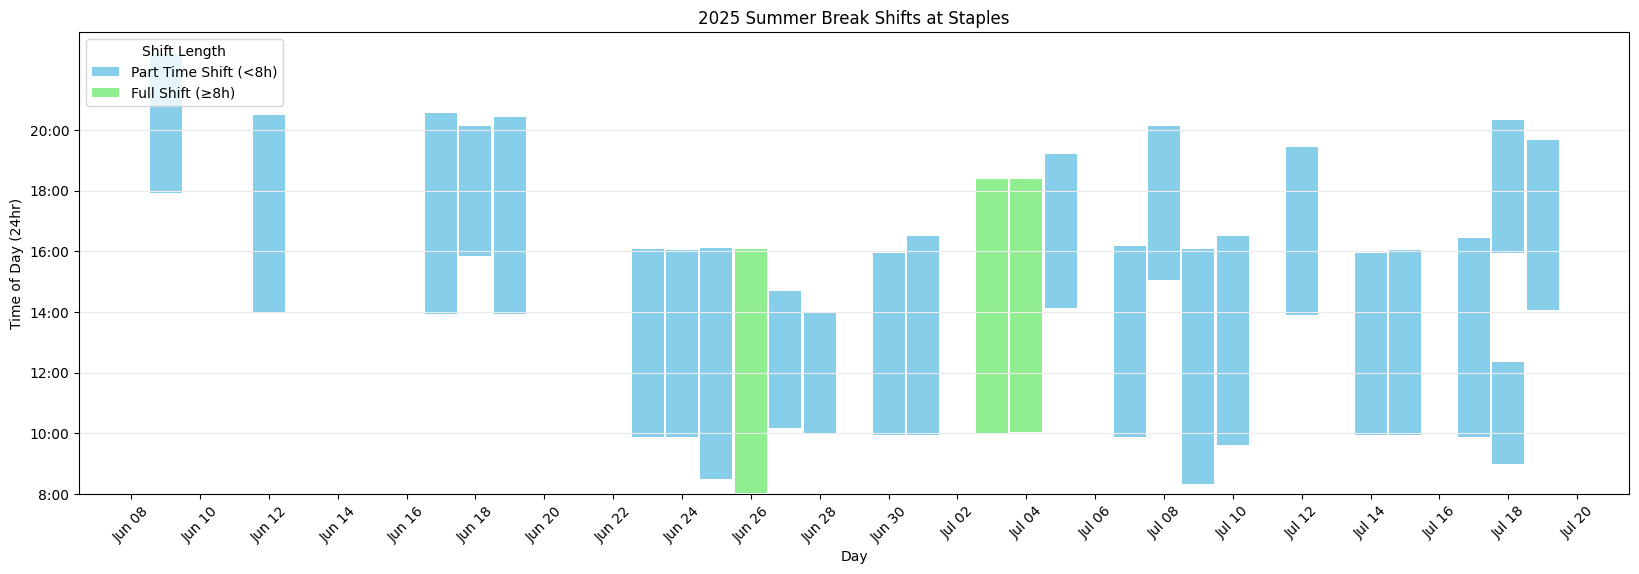

In [16]:
fig, ax = plt.subplots(figsize=(20, 6))

# plot 
for _, row in df.iterrows():

    if row['DATE'] == 'NaT':
        continue

    duration = (row['OUT'].hour + row['OUT'].minute / 60) - (row['IN'].hour + row['IN'].minute / 60)
    color = 'skyblue'
    if duration >= 8:
        color='lightgreen'

    print(type(row['DATE']))
    ax.bar(x=row['DATE'],
            height=duration,
            bottom=row['IN'].hour + row['IN'].minute / 60,
            width=0.93,
            label='shift',
            color=color)

# title 
if currentYear == '2025':
    ax.set_title("2025 Summer Break Shifts at Staples")
else: 
    ax.set_title("2023-24 Shifts at Staples")


# format y axis
ax.set_ylabel("Time of Day (24hr)")
ax.set_yticks(range(8, 22, 2))
ax.set_yticklabels([f"{h}:00" for h in range(8, 22, 2)])
ax.yaxis.grid(True, which='major', color="#EBEBEB")


# format x axis 
ax.set_xlabel("Day")
ax.tick_params(axis='x', rotation=45)
if currentYear == '2025':
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
else: 
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %Y'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=round(len(df) / 18)))


# custom legend entries
legend_elements = [
    Patch(facecolor='skyblue', label='Part Time Shift (<8h)'),
    Patch(facecolor='lightgreen', label='Full Shift (≥8h)')
]
ax.legend(handles=legend_elements, loc='upper left', title='Shift Length')

plt.show()